<a href="https://colab.research.google.com/github/GraceJulius/FDSFE_GJulius/blob/main/HW8/NN101_MNISTprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The goal of this homework is to create three neural network to solve the same problem and compare the performance of each. The problem is the classic prediction of hand written digits. We use the MNIST benchmark dataset which contains 60,000 images of handwritten digits and the corresponding labels

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
#download the data
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
# how many labels are available?
y_train.shape

(60000,)

In [ ]:
#what is the shape of the postage stamps that constitute the dataset?
x_train.shape

(60000, 28, 28)

The dataset consists of 60,000 images of postage stamps, each represented as a 28x28 grayscale image. The shape of the postage stamps that constitute the dataset is (60000, 28, 28).

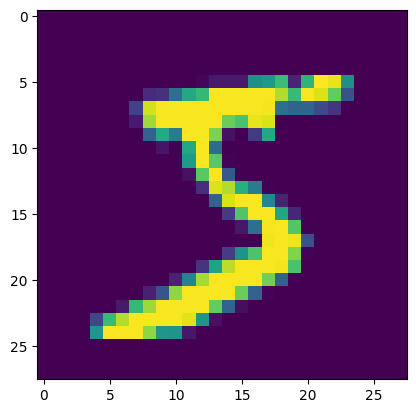

In [ ]:
# show the first input data object

plt.imshow(x_train[0], cmap="viridis");

The first input data object is shown here.

In [ ]:
# check how many possible values are in the target variable
# your code goes here
np.unique(y_train, return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))

There are 10 possible values in the target variable.

In [ ]:
# check what is the minimum and maximum value and data type of the features dataset
# your code goes here
x_train.min(), x_train.max(), x_train.dtype

(0, 255, dtype('uint8'))

The minimum value of the features dataset is 0, the maximum value is 255, and the data type is unsigned 8-bit integer (uint8).

In [ ]:
# scale the imput data so that it is min=0 and max=1 (min-max scaling) and that the values are floating point objects
# your code goes here
x_train = x_train / 255.0
x_test = x_test / 255.0


The input data is being scaled to a range of [0, 1] using min-max scaling, and the values are converted to floating-point objects to prepare the dataset for training.

In [ ]:
# the shape should have not changed
x_train.shape

(60000, 28, 28)

After scaling, the shape did not change as it remained at (60000, 28, 28).

In [ ]:
#the number of pixels in the data is
28*28

784

There are 784 pixels in the data

# Build the first Artificial Neural Network
solve the problem as a regression - see slides for the appropriate choices

- use dense layers
- choose the right number of neurons in output to solve a _regression_ problem
- choose the right activation function on the last layer for a _regression_ problem
- chose the right loss function for a _regression_ problem


In [ ]:
# architecture hyperparametrs
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
# add 1 dense layer with 128 neurons and relu activation function
# add 1 dropout layers dropping 20% of the connections
# add 1 dense layer with 10 neurons
# add the output  layer with 1
# your code goes here
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(1))

model.summary()



/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,781 (397.58 KB)

 Trainable params: 101,781 (397.58 KB)

 Non-trainable params: 0 (0.00 B)

The model consists of a Flatten layer to prepare the input, followed by a Dense layer with 128 neurons and ReLU activation, a Dropout layer dropping 20% of connections, a Dense layer with 10 neurons, and a final Dense output layer with 1 neuron. The total number of trainable parameters is 101,781.

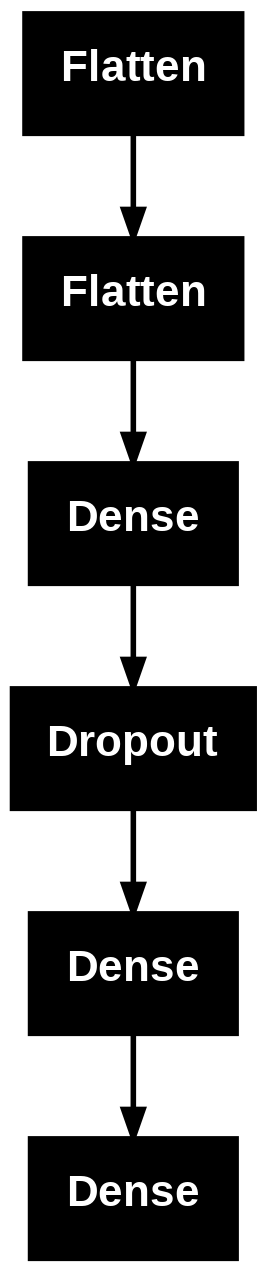

In [ ]:
tf.keras.utils.plot_model(model)

In [ ]:
# training hyperparameter
# choose the MeanSquaredError and Adam as the optimizer

loss_fn = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.Adam()

Mean Squared Error was selected as the loss function, and Adam was chosen as the optimizer for training the model.

In [ ]:
# FBB ADDED
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
)

In [ ]:
#train the model (did you make sure you are using GPUs??)
model.compile(optimizer = optimizer, loss = loss_fn,
              metrics=['accuracy'])
training_history = model.fit(x_train, y_train, epochs=500,
                             callbacks=[callback], validation_split=0.1)

Epoch 1/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.1375 - loss: 3.4175 - val_accuracy: 0.1490 - val_loss: 1.2450
Epoch 2/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1408 - loss: 1.4526 - val_accuracy: 0.1583 - val_loss: 0.9099
Epoch 3/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1462 - loss: 1.2191 - val_accuracy: 0.1765 - val_loss: 0.8614
Epoch 4/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1476 - loss: 1.0709 - val_accuracy: 0.1555 - val_loss: 0.8112
Epoch 5/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1472 - loss: 1.0220 - val_accuracy: 0.1578 - val_loss: 0.7714
Epoch 6/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1478 - loss: 0.9722 - val_accuracy: 0.1697 - val_loss: 0.7603
Epoch 7/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1511 - loss: 0.9511 - val_accuracy: 0.1573 - val_loss: 0.7278
Epoch 8/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1520 - loss: 0

the training_history object contains the loss curves: training loss as `training_history.history["loss"]` and validation loss as `training_history.history["val_loss"]` (note the validation_split argument to model.fit set to 10%).

Show the training and validation losses and comment: is the model overfitting? at what epoch did it start to overfit?

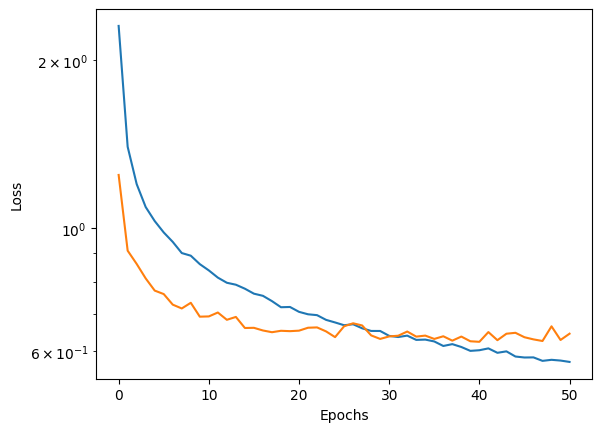

In [ ]:
plt.plot(training_history.history["loss"])
plt.plot(training_history.history["val_loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.yscale('log') #use log scale for the y axis


Yes, The model is overfitting and it starts visibly at epoch 30 as seen in the image above.

In [ ]:
# is this model overfitting? how woudl you find out? how would you fix it?

Yes, the model is overfitting. This is evident because the training loss continues to decrease steadily, while the validation loss stops improving and starts increasing. This indicates that the model is fitting the training data too closely and failing to generalize well to unseen data.

To fix this, I could try the following:

1) Reduce the number of layers or parameters to simplify the model and reduce its capacity to memorize the training data.
2) Use cross-validation to ensure the model performs consistently on different subsets of the data, improving generalization.
3) Suggest increasing the size of the dataset, either by collecting more data or applying data augmentation techniques to introduce variability and improve the model's robustness.


In [ ]:
#what is the accuracy of the model? use model.evaluat to assess it
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1653 - loss: 0.7961


[0.7034116387367249, 0.17350000143051147]

The model accuracy is 16.53% and this indicates that its performance is poor on the test set which could be as a result of overfitting

In [ ]:
# FBB : the accuracy is low but what is the accuracy if your prediction is rounded to the nearest integer?
predictions = model.predict(x_test)
rounded_predictions = np.round(predictions).astype(int)
accuracy = np.mean(rounded_predictions == y_test)
print("Accuracy:", accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy: 0.09806576


This is the accuracy of the prediction after the prediction is being rounded to the nearest integer is 9.81%. This is significantly low

In [ ]:
# show the first 5 data points and corresponding predictions
print(model.predict(x_test[:5]))



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
[[6.7815905 ]
 [2.2034094 ]
 [0.9911155 ]
 [0.51377547]
 [4.36994   ]]


The first 5 predicted data points

In [ ]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

The first 5 data points

# Build a ANN to solve the problem as a multiclass classification

see slides for the apprioriate choices
- use dense layers
- choose the right number of neurons in output to solve a multiclass classification problem
- choose the right activation function on the last layer for a multiclass classification problem
- choose the right loss function for a multiclass classification problem

In [ ]:
# modify the architecture hyperparametrs
# set the last layer to a 10 nerons dense layer and set the softmax as the activation function for the last layer
prob_model = tf.keras.models.Sequential()
# add 1 dense layer with 128 neurons and relu activation function
# add 1 dropout layers dropping 20% of the connections
# add 1 dense layer at the end, how many neurons?
# your code goes here
prob_model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
prob_model.add(tf.keras.layers.Dense(128, activation='relu'))
prob_model.add(tf.keras.layers.Dropout(0.2))
prob_model.add(tf.keras.layers.Dense(10, activation='softmax'))
prob_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

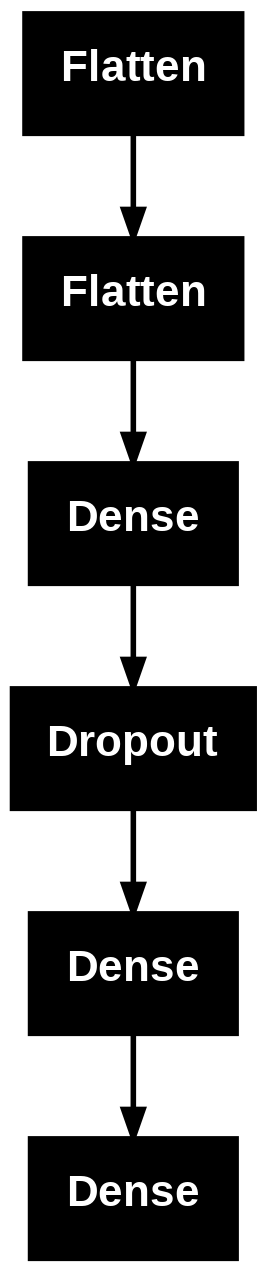

In [ ]:
tf.keras.utils.plot_model(model)

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
)


This stops the code when the validation loss stops improving for a number of epochs as determined by the patience argument.

In [ ]:
#set the loss to be approprpate for the classification, the optimizer to Adam and compile and fit as before
# NOTE: you can either use the Sparse Categorical Loss and leave the labels as they are or use the Categorical Loss but modify the labels to be one-hot-encoded (see slides from class on trees!)
loss = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()
prob_model.compile(optimizer = optimizer, loss = loss,
              metrics=['accuracy'])
prob_training_history = prob_model.fit(x_train, y_train, epochs=500,
                                       callbacks=[callback], validation_split=0.1)




Epoch 1/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9831 - loss: 0.0506 - val_accuracy: 0.9810 - val_loss: 0.0682
Epoch 2/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9844 - loss: 0.0487 - val_accuracy: 0.9802 - val_loss: 0.0735
Epoch 3/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9858 - loss: 0.0413 - val_accuracy: 0.9810 - val_loss: 0.0733
Epoch 4/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9874 - loss: 0.0379 - val_accuracy: 0.9813 - val_loss: 0.0710
Epoch 5/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9873 - loss: 0.0383 - val_accuracy: 0.9817 - val_loss: 0.0758
Epoch 6/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9880 - loss: 0.0350 - val_accuracy: 0.9830 - val_loss: 0.0688
Epoch 7/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9883 - loss: 0.0335 - val_accuracy: 0.9807 - val_loss: 0.0734
Epoch 8/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9907 - loss: 0

I added the the earlyStopping so as to prevent overfitting because of the 500 epochs. This allows it to so training when validation performance stops improving. This way overfitting that happened in the ANN model could have been prevented also.

In [ ]:
#what is the accuracy of the model? use model.evaluat to assess it
prob_model.evaluate(x_test, y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9740 - loss: 0.0811


[0.06914728879928589, 0.9782999753952026]

The model accuracy is 97.83%.

In [ ]:
# show the first 10 data points and corresponding predictions

result = prob_model.predict(x_test[:10])
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
[[9.59327284e-10 8.95291619e-11 6.23611322e-06 6.04353909e-06
  8.26291228e-15 6.52871812e-10 2.19827262e-13 9.99987364e-01
  5.61992497e-09 3.06096609e-07]
 [1.01896642e-08 1.03608099e-05 9.99870062e-01 1.19397686e-04
  1.58249612e-22 5.12077358e-09 3.48049554e-08 5.91172033e-12
  7.19370945e-08 2.72771013e-17]
 [5.79043791e-09 9.99662638e-01 3.37292295e-05 1.68172448e-07
  2.30723731e-06 7.68296616e-07 5.30382067e-06 2.23722207e-04
  7.09685337e-05 4.52989468e-07]
 [9.99687672e-01 9.62136593e-09 1.93244978e-05 6.33654224e-07
  3.08605088e-08 2.22627637e-06 2.84393667e-04 4.55633563e-06
  6.56409682e-08 1.21581979e-06]
 [6.61451941e-06 4.36479568e-11 7.10746065e-07 3.17396709e-09
  9.93869007e-01 5.52732828e-08 2.57782312e-06 1.05489104e-04
  7.57523821e-07 6.01493707e-03]
 [1.08855237e-10 9.99137878e-01 1.28578492e-07 1.30333921e-09
  1.27779958e-06 1.76773851e-09 6.47656107e-09 8.59250140e-04
  1.40256691e-06 3.94589676e-08]
 [1.51927741e-11 1.

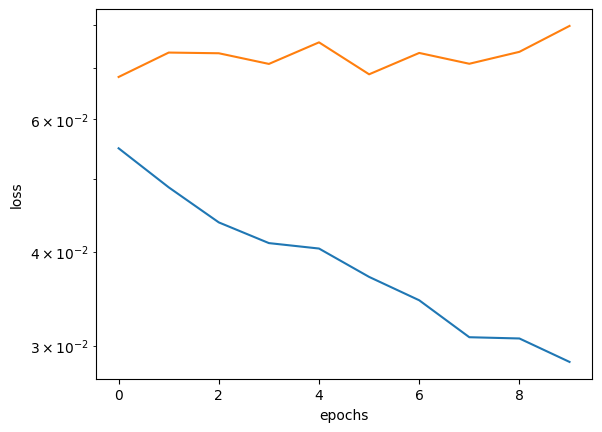

In [ ]:
#show the loss curves and comment
plt.plot(prob_training_history.history["loss"])
plt.plot(prob_training_history.history["val_loss"])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.yscale('log') #use log scale for the y axis


The loss curve indicates that the model is underfitting. While the training loss decreases steadily across epochs, the validation loss remains constant and fluctuates slightly. This behavior could result from insufficient data, or the early stopping mechanism introduced by 'patience,' which might be preventing the model from fully learning."

# Build a CNN (convolutional neural network) to solve the problem as a multiclass classification

- you do not need the Flatten() layer anymore, the input size is not 728 but (28,28)
- use Conv2D layers and MaxPool2D layers alternating them appropriately
- use relu activation functions for the convolutional layers
- add a dense layer at the end for the prediction
- choose the right number of neurons in output to solve a multiclass classification problem
- choose the right activation function on the last layer for a multiclass classification problem
- choose the right loss function for a multiclass classification problem

In [ ]:
#Build a CNN (convolutional neural network) to solve the problem as a multiclass classification
#you do not need the Flatten() layer anymore, the input size is not 728 but (28,28)
#use Conv2D layers and MaxPool2D layers alternating them appropriately
#use relu activation functions for the convolutional layers
#add a dense layer at the end for the prediction
#choose the right number of neurons in output to solve a multiclass classification problem
#choose the right activation function on the last layer for a multiclass classification problem
#choose the right loss function for a multiclass classification problem
model3 = tf.keras.models.Sequential()
# First convolutional layer
model3.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model3.add(tf.keras.layers.MaxPooling2D((2, 2)))

# Second convolutional layer
model3.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model3.add(tf.keras.layers.MaxPooling2D((2, 2)))
# Fully connected dense layer
model3.add(tf.keras.layers.Dense(64, activation='relu'))
model3.add(tf.keras.layers.GlobalAveragePooling2D())
# Output layer with softmax activation for multiclass classification
model3.add(tf.keras.layers.Dense(10, activation='softmax'))
model3.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 5, 5, 64)            │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 64)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,626 (92.29 KB)

 Trainable params: 23,626 (92.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
)

In [ ]:
#set the loss to be approprpate for the classification, the optimizer to Adam and compile and fit as before
# NOTE: you can either use the Sparse Categorical Loss and leave the labels as they are or use the Categorical Loss but modify the labels to be one-hot-encoded (see slides from class on trees!)
loss = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()
model3.compile(optimizer = optimizer, loss = loss,
              metrics=['accuracy'])
CNN_training_history = model3.fit(x_train, y_train, epochs=500,
                                       callbacks=[callback], validation_split=0.1)

Epoch 1/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.5613 - loss: 1.2695 - val_accuracy: 0.9118 - val_loss: 0.3187
Epoch 2/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9086 - loss: 0.3073 - val_accuracy: 0.9067 - val_loss: 0.3008
Epoch 3/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9291 - loss: 0.2377 - val_accuracy: 0.9507 - val_loss: 0.1842
Epoch 4/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9388 - loss: 0.2032 - val_accuracy: 0.9613 - val_loss: 0.1455
Epoch 5/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9499 - loss: 0.1686 - val_accuracy: 0.9643 - val_loss: 0.1246
Epoch 6/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9563 - loss: 0.1479 - val_accuracy: 0.9692 - val_loss: 0.1056
Epoch 7/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9626 - loss: 0.1255 - val_accuracy: 0.9737 - val_loss: 0.0944
Epoch 8/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9646 - loss:

In [ ]:
#what is the accuracy of the model? use model.evaluat to assess it
model3.evaluate(x_test, y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9840 - loss: 0.0526


[0.044728994369506836, 0.9864000082015991]

The accuracy of this model is 98.6%

In [ ]:
# show the first 10 data points and corresponding predictions

result = model3.predict(x_test[:10])
result

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


array([[2.06881712e-08, 4.12331360e-08, 1.63776420e-07, 1.15876149e-10,
        2.62935296e-09, 7.16726811e-09, 5.78660980e-13, 9.99998927e-01,
        1.25069822e-12, 8.13630834e-07],
       [1.08730873e-07, 1.17262662e-05, 9.99987960e-01, 2.03253636e-09,
        4.18130374e-12, 5.46039089e-08, 2.06221415e-07, 2.51193399e-10,
        2.05720885e-09, 1.68226999e-09],
       [1.48326819e-06, 9.99956250e-01, 3.96257605e-07, 4.22637619e-12,
        1.18578946e-05, 9.10964991e-06, 6.83924236e-06, 1.37945844e-05,
        9.12135523e-09, 4.75061341e-07],
       [9.99907732e-01, 5.82496829e-10, 6.90235311e-07, 1.49103101e-13,
        1.02023776e-08, 6.38760685e-06, 8.49145654e-05, 1.71671705e-12,
        9.11441305e-08, 1.71694396e-07],
       [4.99707618e-08, 1.48160109e-06, 6.63582682e-08, 3.24500328e-13,
        9.99934077e-01, 1.42436008e-07, 4.60360781e-07, 3.22646585e-08,
        1.25660626e-09, 6.37296835e-05],
       [1.91981080e-08, 9.99894500e-01, 1.33419400e-08, 1.02017502e-13,
   

The first 10 data points and corresponding predictions

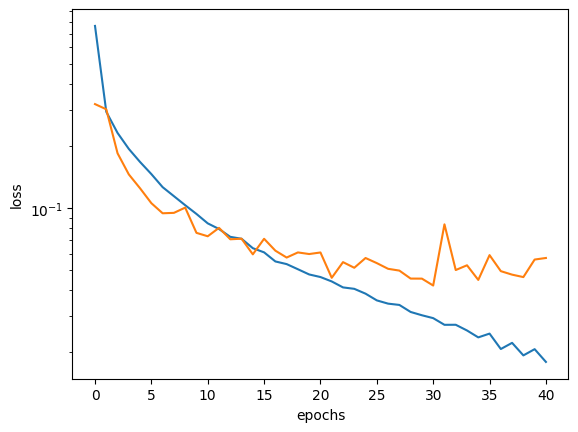

In [ ]:
#show the loss curves and comment
plt.plot(CNN_training_history.history["loss"])
plt.plot(CNN_training_history.history["val_loss"])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.yscale('log') #use log scale for the y axis


This graph represents the loss curves for training and validation. Initially, both losses decrease steadily, indicating effective learning. However, the validation loss begins to fluctuate, occasionally increasing, which suggests the onset of overfitting. This behavior indicates that while the model continues to learn from the training data, its ability to generalize to unseen data is diminishing.